In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});




<IPython.core.display.Javascript object>

## axionCAMB bug fix  
#### by Rayne Liu (rayneliu@uchicago.edu), Daniel Grin (dgrin@haverford.edu), and Wayne Hu (whu@background.uchicago.edu).


### axionCAMB (https://github.com/dgrin1/axionCAMB), 
#### written by Daniel Grin (dgrin@haverford.edu), Doddy Marsh (david.j.marsh@kcl.ac.uk), and Renée Hložek (hlozek@dunlap.utoronto.ca ).
is a modified version of the ${\rm \small CAMB}$ code (https://camb.info/) (used to compute CMB anisotropy power spectra $C_{\ell}$,
matter power spectra $P(k)$, and transfer functions for all the cosmic constituent species) that includes the effect of ultra-light axions, as described in https://arxiv.org/abs/1410.2896 and https://arxiv.org/abs/1708.05681

Thanks to community input (e.g. $\textbf{astralsight5}$, https://github.com/dgrin1/axionCAMB/issues/6). and our own investigation, we have caught a number of bugs which we wish to bring to the attention of users of ${\rm axion{\small CAMB}}$.

In this notebook we discuss each bug in detail, discuss how to fix it, and use a number of axion masses and fractions to quantify the fractional error.

<br>

<br>

<br>

### Section 1. Description of Bugs and Repairs

#### 1.1. Background KG $h$ normalization bug.

The equations of motion have missing factors of $h$ (the dimensionless Hubble constant) in some terms. First reported by $\textbf{astralsight5}$ in https://github.com/dgrin1/axionCAMB/issues/6.

We begin by writing down the homogeneous Klein-Gordon equation, with dots denoting derivatives with respect to conformal time $\tau$:
\begin{equation}
    \ddot{\phi}+2\mathcal{H}\dot{\phi}+m^2 a^2\phi=0.
\end{equation}Define $u_{1}\equiv \phi$ and $u_2\equiv \dot{\phi}$, we obtain a coupled first-order system as usual:
\begin{eqnarray}
    \dot{u}_{1}&=&u_2,\\
    \dot{u}_{2}+2\mathcal{H}u_{2}+m^{2}a^{2}u_{1}&=&0.
\end{eqnarray} Here $\mathcal{H}\equiv \frac{da/d\tau}{a}$.
Renormalizing conformal time as $\tilde{t}=H_0\tau$ and defining $\tilde{u}_{1}\equiv u_{1}$ and $u_{2}=H_0\tilde{u}_{2}$ and $\tilde{m}=\frac{m}{H_0}$, we then obtain
\begin{eqnarray}
    \tilde{u}_{1}'&=&\tilde{u}_{2}.\\
    \tilde{u}_{2}'&=&-2\frac{\tilde{h}}{h}\tilde{u}_{2}-\tilde{m}^{2}a^{2}\tilde{u}_{1},\label{eq:kgb}
\end{eqnarray}
where
\begin{equation}
    \tilde{h}=\frac{\mathcal{H}}{\left(100~{\rm km}~{\rm s}^{-1}~{\rm Mpc}^{-1}\right)},
\end{equation} $H$ is the standard (not conformal) Hubble parameter obtained from the Friedmann equation, and $h=H_{0}/{(\rm 100~{\rm km}~{\rm s}^{-1}~{\rm Mpc}^{-1})}$. Here primes denote derivatives with respect to this new dimensionless conformal time.

We then redefine our fields:
\begin{eqnarray}
        \tilde{u}_{1}=\sqrt{\frac{3}{4\pi G}}\frac{1}{h}\tilde{v}_{1},\\
     \tilde{u}_{2}=\sqrt{\frac{3}{4\pi G}}\frac{1}{h}\tilde{v}_{2},
\end{eqnarray}Applying these definitions in Eq.$~$(\ref{eq:kgb}), we obtain:
\begin{eqnarray}
\tilde{v}_{1}^{'}&=&\tilde{v}_{2},\\
\tilde{v}_{2}^{'}&=&-\frac{2\tilde{v}_2\tilde{h}}{h}-\tilde{m}^2 a^2\tilde{v}_{1}.\label{eq:up_eom}\end{eqnarray}

Now we wish to switch to scale factor as our integration variable. We then have
\begin{eqnarray}
da&=&\frac{da}{dt}dt=aH dt=aH \frac{dt}{d \tau} d\tau=a^{2}H d\tau=a^{2}\frac{\frac{da}{dt}}{a} d\tau\\&=&
a^{2}\frac{\frac{da}{d\tau}\frac{d\tau}{dt}}{a} d\tau=\frac{da}{d\tau}{d\tau}=a\mathcal{H} d\tau=a\tilde{h}\left(100~{\rm km}~{\rm s}^{-1}~{\rm Mpc}^{-1}\right) d\tau=a \tilde{h}\frac{H_{0}}{h}d\tau=a\frac{\tilde{h}}{h}d\tilde{t}.
\end{eqnarray} This then implies that
\begin{eqnarray}
\frac{d\tilde{v}_{1}}{da}&=&\frac{\tilde{v}_{2}h}{a\tilde{h}},\\
\frac{d\tilde{v}_{2}}{da}&=&-\frac{2\tilde{v}_2}{a}-\frac{\tilde{m}^2 ah\tilde{v}_{1}}{\tilde{h}}.\label{eq:up_eom2}\end{eqnarray}We now switch to using $'$ to denote $d/da$, thus obtaining
\begin{eqnarray}
\tilde{v}_{1}^{'}&=&\frac{\tilde{v}_{2}h}{a\tilde{h}},\\
\tilde{v}_{2}^{'}&=&-\frac{2\tilde{v}_2}{a}-\frac{\tilde{m}^2 ah\tilde{v}_{1}}{\tilde{h}}.\label{eq:up_eom3}\end{eqnarray}


From the Friedmann equation, we know that
\begin{equation}
H^{2}=\frac{8\pi G }{3}\left\{\rho_{\rm \gamma}(a)+\rho_{\rm b}(a)+\rho_{\rm CDM}(a)+\rho_{\nu}(a)+\rho_{\phi}(a)\right\}.
\end{equation}Applying the fact that $\rho_{X}=\frac{3H_{0}^{2}}{8\pi G} \Omega_{X}/a^{3}$ for non-relativistic species and $\rho_{X}=\frac{3H_{0}^{2}}{8\pi G} \Omega_{X}/a^{4}$ for relativistic species, the Friedmann equation becomes
\begin{equation}
   H^{2}=H_{0}^{2}\left\{\frac{\Omega_{\rm b}}{a^{3}}+\frac{\Omega_{\rm CDM}}{a^{3}}\right\}+H_{0}^{2}\frac{\Omega_{\rm rad}}{a^4}+\frac{8\pi G}{3}\left[\frac{m^2\phi^2}{2}+\frac{1}{2a^2}\dot{\phi}^{2}\right].\end{equation}
Applying our field redefinitions, this becomes
\begin{equation}
   H^{2}=H_{0}^{2}\left\{\frac{\Omega_{\rm b}}{a^{3}}+\frac{\Omega_{\rm CDM}}{a^{3}}\right\}+H_{0}^{2}\frac{\Omega_{\rm rad}}{a^4}+\mathbf{H}^2\left[\tilde{m}^2\tilde{v}_{1}^{2}+\frac{\tilde{v}_{2}^{2}}{a^2}\right],\end{equation}
   where $\mathbf{H}\equiv H_{0}/h=100~{\rm km}~{s}^{-1}~{\rm Mpc}^{-1}$. We thus have $\tilde{h}=\frac{\mathcal{H}}{\mathbf{H}}$ and obtain
   \begin{equation}
   \tilde{h}=\frac{\mathcal{H}}{\mathbf{H}}=\frac{\frac{da}{a d\tau}}{\mathbf{H}}=\frac{\frac{da}{dt}}{\mathbf{H}}=\frac{aH}{\mathbf{H}}=a\sqrt{\frac{\Omega_{\rm b}h^{2}}{a^{3}}+\frac{\Omega_{\rm CDM}h^{2}}{a^{3}}+\frac{\Omega_{\rm rad}h^{2}}{a^{4}}+\left[\tilde{m}^2\tilde{v}_{1}^{2}+\frac{\tilde{v}_{2}^{2}}{a^2}\right]}.\label{eq:dimenless_hub}
   \end{equation}
   
Although the original version of ${\rm axion{\small CAMB}}$ does implement Eq.$~(\ref{eq:dimenless_hub})$, it does not properly implement Eq.$~(\ref{eq:up_eom2})$, instead coding up 
\begin{eqnarray}\tilde{v}_{1}'&=&\frac{\tilde{v}_{2}}{a\tilde{h}},\\
\tilde{v}_{2}'&=&-\frac{2\tilde{v}_2}{a}-\frac{\tilde{m}^2 a\tilde{v}_{1}}{\tilde{h}}.\end{eqnarray}
This occured because an earlier version of the background used a different definition:
\begin{equation}
\tilde{h}=\frac{\mathcal{H}}{H_{0}},\end{equation} and the code was not corrected self-consistently to use the right equations of motion once the change was made. \textbf{astralsight} caught onto this, and obtained agreement between analytic and numerical densities once this change was implemented. 

At early times, GDM equations are used to solve the perturbation EOMs - these are exact but require the computation of the adiabatic sound speed
\begin{equation}
c_{\rm ad}^{2}\equiv\frac{\dot{P}}{\dot{\rho}}
\end{equation} for the scalar field. As $t\to 0$, one can show that a slowly rolling scalar-field exhibits $c_{\rm ad}^{2}=-7/3$, and indeed this fact was used to initially diagnose the need for a more robust integrator than $\textbf{rk4}$ in the ${\rm axion{\small CAMB}}$ background module. However, missing factors of $h$ in the expression used in ${\rm axion{\small CAMB}}$'s $c_{\rm ad}^{2}$ absorbed missing factors of $h$ in a way that prevented $c_{\rm ad}^{2}$ from being diagnostically useful for the $h$ issue in the EOMs. Either way, there is a related bug in the expression for the adiabatic sound speed.

The pressure (analogously) is $P_\phi=\frac{\dot{\phi}^{2}}{2a^2}-\frac{m^{2}\phi^{2}}{2}$, and so the equation of state parameter is
\begin{equation}
    w_\phi=\frac{\left[\frac{\tilde{v}_{2}^{2}}{a^{2}}-\tilde{m}^{2}\tilde{v}_{1}^{2}\right]}{\left[\frac{\tilde{v}_{2}^{2}}{a^{2}}+\tilde{m}^{2}\tilde{v}_{1}^{2}\right]}.
\end{equation}
To find the adiabatic sound speed, we differentiate the energy density
\begin{equation}
\dot{\rho}_\phi=\frac{\dot{\phi}\ddot{\phi}}{a^{2}}+m^{2}\phi \dot{\phi}-\frac{\dot{\phi}^{2}\frac{da}{d\tau}}{a^{3}}.
\end{equation}Applying the second-order equation of motion we have $\ddot{\phi}/a^{2}+m^{2}\phi=-\frac{2\mathcal{H}\dot{\phi}}{a^{2}}$, and so
\begin{equation}
    \dot{\rho}_\phi=-\frac{3\dot{\phi}^{2}\mathcal{H}}{a^{2}}.
\end{equation}
Analogously we have
\begin{equation}
    \dot{P}_{\phi}=-\frac{3\dot{\phi}^{2}\mathcal{H}}{a^{2}}-2m^{2}\phi\dot{\phi}.
\end{equation}
The adiabatic sound speed may thus be analytically obtained once we have a numerical solution for our ODEs:
\begin{eqnarray}
\begin{aligned}
      c_{\rm ad}^{2}\equiv\frac{\dot{P}_{\phi}}{\dot{\rho}_{\phi}}&=1+\frac{2m^{2}a^{2}\phi}{3\mathcal{H}\dot{\phi}}\\
    &=1+\frac{2\tilde{m}^2 a^2 \tilde{v}_{1}h}{{3\tilde{h}\tilde{v}_{2}}},
\end{aligned}
\end{eqnarray}while the original code used the expression
\begin{equation}
 c_{\rm ad}^{2}=1+\frac{2\tilde{m}^2 a^2 \tilde{v}_{1}}{{3\tilde{h}\tilde{v}_{2}}}.\end{equation}
These expressions are more stable than trying to numerically differentiate $w$ or $P$.




$\textit{Repair:}$

In ``axion_background.f90``: change the lines under the comment "``Solving Equation described and defined in top part of this fortran file``" from 

```
dvt_da(1)=v(2)/(a*(lhr))
dvt_da(2)=-2.0d0*v(2)/(a)-(maxion_twiddle**2.0d0)*a&
      *v(1)/(lhr)
```

to

```
dvt_da(1)=v(2)*dsqrt(hsq)/(a*(lhr))
dvt_da(2)=-2.0d0*v(2)/(a)-(maxion_twiddle**2.0d0)*a&
      *v(1)*dsqrt(hsq)/(lhr)
```

then, in the block after "``calculate axion adiabatic sound speed Pdot/rhodot, asymptoting to constant (physical) value at low a, when small machine numbers start to behave badly``", change

```
Params%cs2_table(i)=1.0d0+2.0d0*((maxion_twiddle*a_arr(i))**2.0d0)*v_vec(1,i)/(3.0d0*v_vec(2,i)*littlehfunc(i))
```

to

```
Params%cs2_table(i)=1.0d0+2.0d0*((maxion_twiddle*a_arr(i))**2.0d0)*v_vec(1,i)*dsqrt(hsq)/(3.0d0*v_vec(2,i)*littlehfunc(i))
```

#### 1.2. Background $\mathcal{H}$ bug.

Likely corresponds to a $\mathcal{O}(10^{-2})$ error. From a mistreatment of massive neutrinos when trying to reproduce the Hubble expansion history that matches what's in the original ${\rm \small CAMB}$ separately in ``axion_background.f90``. Essentially the error leads to a miscalculation of the contribution of $\textbf{massless}$ neutrinos when some neutrinos are $\textbf{massive}$. As early chains with ${\rm axion{\small CAMB}}$ were run with $m_{\nu}=0$, this error was not noticed early on. Now that $\textit{Planck}$ uses a fiducial value of $m_{\nu}=0.06~{\rm eV}$, the error was easier to notice.

The following fix code piece is from DG.

$\textit{Repair:}$


**a.** In ``inidriver_axion.f90``, before the line ``grhog= ((kappa/(c**2.0d0)*4.0d0...``, add

```
if (P%Num_nu_massive > 0) then
    if (P%Nu_mass_eigenstates==0) stop 'Have Num_nu_massive>0 but no nu_mass_eigenstates'
    if (P%Nu_mass_eigenstates==1 .and. P%Nu_mass_numbers(1)==0) P%Nu_mass_numbers(1) = P%Num_Nu_Massive
    if (all(P%Nu_mass_numbers(1:P%Nu_mass_eigenstates)==0)) P%Nu_mass_numbers=1 !just assume one for all
    if (P%share_delta_neff) then
        !default case of equal heating of all neutrinos
        fractional_number = P%Num_Nu_massless + P%Num_Nu_massive
        actual_massless = int(P%Num_Nu_massless + 1e-6_dl)
        neff_i = fractional_number/(actual_massless + P%Num_Nu_massive)
        nu_massless_degeneracy = neff_i*actual_massless
        P%Nu_massless_degeneracy=nu_massless_degeneracy
        P%Nu_mass_degeneracies(1:P%Nu_mass_eigenstates) = P%Nu_mass_numbers(1:P%Nu_mass_eigenstates)*neff_i
    end if
    if (abs(sum(P%Nu_mass_fractions(1:P%Nu_mass_eigenstates))-1) > 1e-4) &
    stop 'Nu_mass_fractions do not add up to 1'
else
    P%Nu_mass_eigenstates = 0
end if
```

**b.** In ``modules.f90``, in ``type CAMBparams``, add in appropriate places (I used under ``real(dl)  :: Nu_mass_degeneracies(max_nu)``)

```
real(dl) :: Nu_massless_degeneracy
```

in ``subroutine CAMBParams_Set(P, error, DoReion)``, right before the line ``if (CP%Num_nu_massive > 0) then``, add

```
CP%Nu_massless_degeneracy=nu_massless_degeneracy
```

**c.** In ``axion_background.f90``, change the line

```
lhsqcont_massless=(Params%Num_Nu_massless*grhor*(c**2.0d0)/((1.d5**2.0d0)))/3.0d0
```

to

```
lhsqcont_massless=(Params%nu_massless_degeneracy*grhor*(c**2.0d0)/((1.d5**2.0d0)))/3.0d0
```

#### 1.3. $\texttt{T_CMB}$ bug.
$\textit{Repair:}$


Likely corresponds to a $\mathcal{O}(10^{-3})$ error (? not too sure) depending on the input value of CMB temperature in ``params.ini``. From the scattered use of the COBE CMB temperature in the code (2.7255K) instead of the input CMB temperature value. Hence if the input CMB value is the same as COBE there's no inconsitency, otherwise there is.

DG found the inconsistency but RL attempted her own fix and tested it by checking that the ``adotoa`` as fixed above in 1.2 is still consistent under a difference input CMB temperature (2.7K). The fix is primarily searching for all remaining occurrences of ``COBE`` to whatever expression corresponding to ``CP%T_CMB``.

**a.** In ``inidriver_axion.f90``: under "``Compute  some basic constants``". change

```
omegah2_rad=((COBE_CMBTemp**4.0d0)/(rhocrit))/(c**2.0d0)
```

to

```
omegah2_rad=((P%tcmb**4.0d0)/(rhocrit))/(c**2.0d0)
```

And before "``RH added this here because we are calculating omegav - but not trying to change anything globally``", change 

```
grhog= ((kappa/(c**2.0d0)*4.0d0*sigma_boltz)/(c**3.0d0))*(COBE_CMBTemp**4.0d0)*(Mpc**2.0d0) 
```

to

```
grhog= ((kappa/(c**2.0d0)*4.0d0*sigma_boltz)/(c**3.0d0))*(P%tcmb**4.0d0)*(Mpc**2.0d0) 
```

**b.** In ```axion_background.f90```, 
under ```Initialize massive and massless neutrino variables```, change

```
grhog = ((kappa/(c**2.0d0)*4.0d0*sigma_boltz)/(c**3.0d0))*(COBE_CMBTemp**4.0d0)*(Mpc**2.0d0) 
```

to

```
grhog = ((kappa/(c**2.0d0)*4.0d0*sigma_boltz)/(c**3.0d0))*(Params%TCMB**4.0d0)*(Mpc**2.0d0)
```

under "``calculate critical density``", change

```
Params%omegah2_rad=((COBE_CMBTemp**4.0d0)/(rhocrit))/(c**2.0d0)
```

to

```
Params%omegah2_rad=((Params%TCMB**4.0d0)/(rhocrit))/(c**2.0d0)
```

**c.** In ``equations_ppf.f90``, in ``function GetOmegak()``, change

```
omegah2_rad=((COBE_CMBTemp**4.0d0)/(rhocrit))/(c**2.0d0)
```

to

```
omegah2_rad=((CP%TCMB**4.0d0)/(rhocrit))/(c**2.0d0)
```

#### 1.4. $\texttt{svec}$ bug.


Likely corresponds to a $\mathcal{O}(10^{-4})$ error. One of the matrix entries in the RK78 routine in ``axion_background.f90`` was erroneously entered. The coefficients for the integrator used can be found in 
on page 75 of 
$\textit{Classical Fifth-, Sixth-, Seventh-, and Eighth-Order Runge-Kutta Formulas with Stepsize Control}$, by E. Fehlberg, http://hdl.handle.net/2060/19680027281, (NASA Huntsville, 1968).

$\textit{Repair:}$
This snippet is from DG.
In ``axion_background.f90``, change

```
svec(15)=0.3082649547580d-1
```

to 

```
svec(15)=0.3072649547580d-1
```


#### 1.5. Wavenumber sampling for transfer function tests. The below change is not made in the main new released bug-fixed version.

#### <font text color = #2082b0> RL notes (for the below $T(k)$ and $P(k$) tests):

<font text color = #2082b0> Since the initial k-sampling (when $\texttt{get_scalar_cls = F}$ features a minimum $k$ value $\texttt{qmin}$, which depends on the present-day conformal time $\texttt{tau0}$, which is in turn cosmology dependent. To enable plotting of fractional differences between transfer functions RL has tweaked the block of code in $\texttt{subroutine InitTransfer}$ in $\texttt{cmbmain.f90}$ so that it starts with a fixed minimum $k$ value. (The "oscillatory" feature of the transfer function in $k$ space makes interpolation difficult and unreliable.)</font>

<br>

<font text color = #2082b0>**This should not end up in the final version of the code.** 

<font text color = #2082b0> The particular block of code RL changed **(for both the bug-corrected and uncorrected code)**:</font> 
    
In ```axion_background.f90```, in the subroutine ```InitTransfer```, 
under ```Fixed spacing```, change

MT%num_q_trans=int((log(CP%Transfer%kmax)-log(qmin))*CP%Transfer%k_per_logint)+1 
    
allocate(q_transfer(MT%num_q_trans))
    
do q_ix=1, MT%num_q_trans
    
    q_transfer(q_ix) = qmin*exp(real(q_ix)/CP%Transfer%k_per_logint) 
    
end do

```to```
    
MT%num_q_trans=int((log(CP%Transfer%kmax)-log(1.e-6))*CP%Transfer%k_per_logint)+1 
    
allocate(q_transfer(MT%num_q_trans))
    
do q_ix=1, MT%num_q_trans
    
    q_transfer(q_ix) = 1.e-6*exp(real(q_ix)/CP%Transfer%k_per_logint)
    
end do
```

i.e. essentially replacing ``qmin`` with a sufficiently small number ``1.e-6`` (two places).

<br>

<br>

<br>


### Section. 2. $\texttt{subprocess}$ implementation.

To generate large batches of bug-fixed vs non-bug-fixed plots, it is helpful to be able to call ${\rm axion{\small CAMB}}$ from python through the command line. Current versions of ${\rm \small CAMB}$ use ${\rm py{\small CAMB}}$ to accomplish this goal, but since ${\rm axion{\small CAMB}}$ is based on a 2012 release of ${\rm \small CAMB}$, we had to implement such changes independently.


You should create or download two local copies of ${\rm axion{\small CAMB}}$, one without any fixes and the other with the above fixes. The following cells run the comparison between the two versions, although independent reproducing the results and cross-checking is very appreciated. The below changes thus need to be made in both the bug-fixed
and bug-fixed code to run the below tests.

#### Since a relatively large number of modifications to ``params.ini`` and running are happening, we can make our lives easier by calling via $\texttt{subprocess}$ in Python. This way, we can tweak the parameters easily and run through a for-loop.

The step-by-step instruction is as follows: (inspired by a document David Zegeye provided from the Grin group at Haverford)

**a.** Identify the parameters we'd like to change in ``params.ini``:

 - ``get_scalar_cls`` - we want it ``T`` when outputting the $Cl$s, but due to some peculiarities of the internal CAMB structure, when it's set to ``F``, we obtain a more densely-sampled $k$ for transfer function output (i.e. it follows the user-specified $k$ sampling. When ``T``, there are CAMB internal restrictions applied to the $k$ sampling.)
 
 - ``l_max_scalar`` - I set it to 5000 while the default was 2500. Usually 5000 should be enough to show all the damping tails of $C_l$, but it's good to keep it flexible.
 
 - Note that we will be using axion energy density fraction so we use ``use_axfrac = T`` in the code. To make sure we don't mess up we can also comment out ``omaxh2``. This will not change in our calls.
  
 - ``m_ax`` - mass of axions.
  
 - ``axfrac`` - fraction of axions as dark matter.
  
 - ``transfer_kmax`` - the maximum $k$ in the transfer function. We may need to tweak that to show the transfer function features for different axion masses.
  
 - ``transfer_k_per_logint`` - controls the user-specified $k$-sampling density.
  
  This run doesn't involve changing ``accuracyboost``, but it may be added for relevant purposes later.
  
  We have a total of 6 inputs to specify in the code.

**b.** In ``inidriver_axion.F90``, change line 34 (immediately after ``LensedTotFileName, LensPotentialFileName,ScalarCovFileName`` from

```
integer i
```

to

```
integer i, int1, int2, int3, int4, int5, int6
```
; **then,** at line 62 (right after ``! End axion stuff``), insert

```
character(LEN=1) buffer1, buffer3, buffer5, buffer7, buffer9, buffer11
character(LEN=23) buffer2, buffer4, buffer6, buffer8, buffer10, buffer12
logical get_scalar_cls
integer l_max_scalar, transfer_k_per_logint
real(dl) transfer_kmax, m_ax, axfrac
```

; **then,** right after "``End axion stuff``", insert

```
call getarg(2,buffer1)
read(buffer1,*) int1
call getarg(3,buffer2)
read(buffer2,*) get_scalar_cls

call getarg(4,buffer3)
read(buffer3,*) int2
call getarg(5,buffer4)
read(buffer4,*) l_max_scalar

call getarg(6,buffer5)
read(buffer5,*) int3
call getarg(7,buffer6)
read(buffer6,*) transfer_k_per_logint

call getarg(8,buffer7)
read(buffer7,*) int4
call getarg(9,buffer8)
read(buffer8,*) transfer_kmax

call getarg(10,buffer9)
read(buffer9,*) int5
call getarg(11,buffer10)
read(buffer10,*) m_ax

call getarg(12,buffer11)
read(buffer11,*) int6
call getarg(13,buffer12)
read(buffer12,*) axfrac
```

Up to  now the code is setting up ${\rm axion{\small CAMB}}$ to expect additional arguments to be fed to it when it is called from the command line. **This also sets up the order at which the parameters are passed in. **

``get_scalar_cls, l_max_scalar, transfer_k_per_logint, transfer_kmax, m_ax, axfrac``

**c.** Now we're feeding the input into the code in the appropriate slots.

Right after ``P%WantScalars = Ini_Read_Logical('get_scalar_cls')``, insert

```
if (int1.eq.1) then
   P%WantScalars = get_scalar_cls
end if
```

Right after ``P%Max_l = Ini_Read_Int('l_max_scalar')``, insert

```
if (int2.eq.2) then
  P%Max_l = l_max_scalar
end if
```

Right after ``P%transfer%k_per_logint  =  Ini_Read_Int('transfer_k_per_logint')``, add

```
if (int3.eq.3) then
   P%transfer%k_per_logint = transfer_k_per_logint
end if
```

Right after ``P%transfer%kmax          =  Ini_Read_Double('transfer_kmax')``, add

```
if (int4.eq.4) then
    P%transfer%kmax =  transfer_kmax
end if
```

Right after `` P%ma     = Ini_Read_Double('m_ax')`` (**note there are two identical lines like this, and we'll need to do that for each line)**, add

```
if (int5.eq.5) then
    P%ma = m_ax
end if
```

Right after ``P%axfrac = Ini_Read_Double('axfrac')``, add

```
if (int6.eq.6) then
    P%axfrac = axfrac
end if
```

**d.** Recompile. ``make clean`` and ``make``.

**e.** Run via

``./camb params.ini 1 # 2 # 3 # 4 # 5 # 6 #``

in the same order as specified above:

``1 get_scalar_cls 2 l_max_scalar 3 transfer_k_per_logint 4 transfer_kmax 5 m_ax 6 axfrac``

Repeat the practice above for the debugged ${\rm axion{\small CAMB}}$. 

<br>

<br>

<br>


### Section 3 - data generation. The below commands generate data for plots over a range of masses and axion fractions $f_{\rm ax}\equiv \frac{\Omega_{\rm ax}}{\Omega_{\rm ax}+\Omega_{\rm c}}$. The directory containing this bug fix has subdirectories
```axionCAMB-bugfix```
and 
```axionCAMB-nobugfix``` with the relevant changes made/not made (but the subprocess and $k$-sampling changes made), with directories set below to work with these as relative subpaths of whatever path you are running this ${\rm \small{jupyter}}$ notebook in.

In [2]:
#useful commands for plotting
#Modules to import
import os
import subprocess
import numpy as np
from scipy import interpolate, integrate
import natpy as nat
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' #This backend works magically clear plots
#%config InlineBackend.figure_format = 'png' #But to show on github I need to use png - 
                                            #or keep svg and use the publicnbconverter
#For \text command
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['figure.dpi']= 72.0 #For svg
#plt.rcParams['figure.dpi']= 216.0 #For svg
plt.rcParams['lines.linewidth'] = 2.3
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.family"] = "cmr10"
plt.rcParams["font.size"] = 16
plt.rcParams["axes.xmargin"] = 0
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = (1,1,1,0) #For transparent plot background
plt.rcParams["grid.color"] = "#dddddd"
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "none"
from num2tex import num2tex


In [3]:
#Set up parent directory to be whereever the notebook is being run
import os
parent_path=str(os.getcwd())

### Before plotting, let's generate all the data we need, so that we can save some time not running the whole thing again if it's just the plot itself that needs some adjusting.

In this notebook, I take the mass ranges: $10^{-26}~{\rm eV}$, $10^{-29}~{\rm eV}$,$10^{-32}~{\rm eV}$; $f_\text{ax}$ ranges: 1e-3, 1e-1, 0.5, 1.0; ``get_scalar_cls`` being T, F (F is for generating the transfer function with a denser (user-specified) k-sampling. Due to CAMB's internal structure, this is suppressed (i.e. we get a sparser $k$ sampling than we input) under ``get_scalar_cls`` being T.

<br>

This choice is motivated by that we would like to see the impacts of the bug, which are most observable for masses with ``a_osc ~ a_eq``, when the axion fraction as a function of time starts to become non-negligible as we leave radiation-domination, and the axion perturbations exhibit the most oscillatory behavior.

<br>

<br>

**Each cell below (2 ``get_scalar_cls``, 3 axion masses, 4 axion fractions - 24 runs altogether for one particular code) take about 5-6min to run. The time will be longer if we choose higher mass axions which need to go to higher $k$ modes to display any oscillatory behavior in the transfer function. Low mass axions take significantly shorter time.**

#### <font text color = #2082b0> Remember to complie by $\texttt{make clean}$ and $\texttt{make}$ before running the subprocess cells below.

a. #### Undebugged axionCAMB

In [4]:
#IF YOU HAVE THE NEED TO CHANGE DIRECTORY, DO IT BEFORE CALLING SUBPROCESS
usep=parent_path+'/axionCAMB-nobugfix'
os.chdir(usep)

#Dimensionless hubble from the params.ini file
h = 67.31/100.00

#Pre-set the parameters I might not need to modify for this cell - mind the order
l_max_scalar = 5000 
transfer_k_per_logint = 100 


#THE FOLLOWING ARE THE RANGES OF VARIABLES THAT ARE ACTUALLY VARYING. 
#We can make a smaller list to check if it works first
get_scalar_cls_list = ['T', 'F']# #use string here to put in the call command
m_ax_list = ['1.e-26', '1.e-29', '1.e-32']#use string here to put in the call command 
m_ax_label_list = [m_axitem.replace('.', '') for m_axitem in m_ax_list] #To put in filenames
axfrac_list = ['1.e-3', '0.1', '0.5', '1.0'] #use string here to put in the call command 
                                            # (or else python would set it to zero)
axfrac_label_list_temp = [axfrac_item.replace('.e', 'e') for axfrac_item in axfrac_list] 
axfrac_label_list = [axfrac_item.replace('.', 'd') for axfrac_item in axfrac_label_list_temp] #To put in filenames
#print(axfrac_label_list)
#Range of maximum k corresponding to the respoective axion masses,
#(for purposes of showing the best range of the transfer function)
#NOTE THAT THE INPUT K IN CAMB IS ACTUALLY KH. To obtain our desired k in Mpc^-1, divide our
#k by h before feeding it to CAMB.
kmax_list = [3, 1, 0.3, 0.1]


#Generate data
for i in range(len(get_scalar_cls_list)):
    get_scalar_cls = get_scalar_cls_list[i]
    for j in range(len(axfrac_list)):
        axfrac = axfrac_list[j]
        axfrac_label = axfrac_label_list[j]
        for k in range(len(m_ax_list)):
            m_ax_label = m_ax_label_list[k]
            
            #Can comment out the print statement if wanted, more for confirming/progress checking purposes
            print('./camb params.ini 1 %s 2 %i 3 %i 4 %s 5 %s 6 %s'%(get_scalar_cls, l_max_scalar, \
                                               transfer_k_per_logint, str(kmax_list[k]/h), m_ax_list[k], axfrac))
            subprocess.call('./camb params.ini 1 %s 2 %i 3 %i 4 %s 5 %s 6 %s'%(get_scalar_cls, l_max_scalar, \
                                               transfer_k_per_logint, str(kmax_list[k]/h), m_ax_list[k], axfrac), shell = True)
            #print('transfer_max=%seV_axfrac=%s_getscalarcls=%s.dat'%(m_ax_label, axfrac_label, get_scalar_cls))
            #Move transfer function files
            subprocess.call('mv test_transfer_out.dat transfer_max=%seV_axfrac=%s_getscalarcls=%s.dat'\
                            %(m_ax_label, axfrac_label, get_scalar_cls), shell = True)  
            #Move matter power spectrum files
            #print('matterpower_max=%seV_axfrac=%s_getscalarcls=%s.dat'%(m_ax_label, axfrac_label, get_scalar_cls))
            subprocess.call('mv test_matterpower.dat matterpower_max=%seV_axfrac=%s_getscalarcls=%s.dat'\
                            %(m_ax_label, axfrac_label, get_scalar_cls), shell = True)
            if get_scalar_cls == 'T':
                #Move scalar_cls files
                #print('scalCls_max=%seV_axfrac=%s.dat' %(m_ax_label, axfrac_label))
                subprocess.call('mv test_scalCls.dat scalCls_max=%seV_axfrac=%s.dat'%(m_ax_label, axfrac_label), \
                                shell = True)  

./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1.e-26 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)
Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.118881
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.000119
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040386
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1090.00
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040527
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.34  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.826836824    
./cam

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.118881
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.000119
a_osc               =  0.31E-02
ma/eV            =  0.10E-28
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040591
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.88
100*theta            =  1.040739
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.60
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160657
tau_recomb/Mpc       =  281.41  tau_now/Mpc =  14202.5
 at z =    0.00000000      sigma8 (all matter)=  0.825000584    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1.e-32 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.118881
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.000119
a_osc               =  0.30E+00
ma/eV            =  0.10E-31
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040410
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.835
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.89
100*theta            =  1.040558
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.60
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160630
tau_recomb/Mpc       =  281.45  tau_now/Mpc =  14205.0
 at z =    0.00000000      sigma8 (all matter)=  0.826276779    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1.e-26 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.107100
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.011900
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040557
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.88
100*theta            =  1.040698
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.59
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.34  tau_now/Mpc =  14202.5
 at z =    0.00000000      sigma8 (all matter)=  0.726423979    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1.e-29 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.107100
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.011900
a_osc               =  0.31E-02
ma/eV            =  0.10E-28
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.061855
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.07
r_s(zstar)/Mpc       =  148.00
100*theta            =  1.062624
zdrag                =  1058.79
r_s(zdrag)/Mpc       =  150.79
k_D(zstar) Mpc       =  0.1373
100*theta_D          =  0.164283
tau_recomb/Mpc       =  287.71  tau_now/Mpc =  14215.3
 at z =    0.00000000      sigma8 (all matter)=  0.587252796    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1.e-32 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.764
Om_b h^2             =  0.022220
Om_c h^2             =  0.107100
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.011900
a_osc               =  0.30E+00
ma/eV            =  0.10E-31
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.042792
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.895
zstar                =  1088.93
r_s(zstar)/Mpc       =  148.07
100*theta            =  1.043636
zdrag                =  1058.67
r_s(zdrag)/Mpc       =  150.86
k_D(zstar) Mpc       =  0.1371
100*theta_D          =  0.161516
tau_recomb/Mpc       =  287.63  tau_now/Mpc =  14475.4
 at z =    0.00000000      sigma8 (all matter)=  0.730406761    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1.e-26 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.059500
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.059500
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.041253
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1090.00
r_s(zstar)/Mpc       =  144.98
100*theta            =  1.041393
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.69
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160617
tau_recomb/Mpc       =  281.63  tau_now/Mpc =  14202.6
 at z =    0.00000000      sigma8 (all matter)=  0.482368767    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1.e-29 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.059500
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.059500
a_osc               =  0.31E-02
ma/eV            =  0.10E-28
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.166908
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.835
zstar                =  1085.07
r_s(zstar)/Mpc       =  163.43
100*theta            =  1.170897
zdrag                =  1055.55
r_s(zdrag)/Mpc       =  166.58
k_D(zstar) Mpc       =  0.1231
100*theta_D          =  0.182792
tau_recomb/Mpc       =  318.52  tau_now/Mpc =  14275.9
 at z =    0.00000000      sigma8 (all matter)=  0.114567213    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1.e-32 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.050
Om_b h^2             =  0.022220
Om_c h^2             =  0.059500
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.059500
a_osc               =  0.30E+00
ma/eV            =  0.10E-31
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.044532
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  14.189
zstar                =  1084.14
r_s(zstar)/Mpc       =  164.04
100*theta            =  1.048802
zdrag                =  1054.74
r_s(zdrag)/Mpc       =  167.24
k_D(zstar) Mpc       =  0.1217
100*theta_D          =  0.165104
tau_recomb/Mpc       =  319.57  tau_now/Mpc =  15960.5
 at z =    0.00000000      sigma8 (all matter)=  0.363063723    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1.e-26 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.000000
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.119000
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.042071
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.836
zstar                =  1089.99
r_s(zstar)/Mpc       =  145.11
100*theta            =  1.042215
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.83
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160610
tau_recomb/Mpc       =  281.67  tau_now/Mpc =  14205.1
 at z =    0.00000000      sigma8 (all matter)=  0.368214160    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1.e-29 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =  11.501
Om_b h^2             =  0.022220
Om_c h^2             =  0.000000
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.119000
a_osc               =  0.35E-02
ma/eV            =  0.10E-28
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.640580
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  11.863
zstar                =  1080.40
r_s(zstar)/Mpc       =  193.04
100*theta            =  1.652228
zdrag                =  1051.81
r_s(zdrag)/Mpc       =  196.90
k_D(zstar) Mpc       =  0.1027
100*theta_D          =  0.261818
tau_recomb/Mpc       =  378.02  tau_now/Mpc =  12061.5
 at z =    0.00000000      sigma8 (all matter)=   6.62320247E-03
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1.e-32 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   8.250
Om_b h^2             =  0.022220
Om_c h^2             =  0.000000
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.119000
a_osc               =  0.30E+00
ma/eV            =  0.10E-31
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  0.962165
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  14.866
zstar                =  1075.96
r_s(zstar)/Mpc       =  197.50
100*theta            =  0.972830
zdrag                =  1047.92
r_s(zdrag)/Mpc       =  201.75
k_D(zstar) Mpc       =  0.0954
100*theta_D          =  0.162164
tau_recomb/Mpc       =  386.72  tau_now/Mpc =  20689.7
 at z =    0.00000000      sigma8 (all matter)=   3.06564253E-02
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1.e-26 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.118881
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.000119
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040386
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.834
zstar                =  1090.00
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040527
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.34  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.826792181    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1.e-29 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.118881
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.000119
a_osc               =  0.31E-02
ma/eV            =  0.10E-28
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040591
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.88
100*theta            =  1.040739
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.60
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160657
tau_recomb/Mpc       =  281.41  tau_now/Mpc =  14202.5
 at z =    0.00000000      sigma8 (all matter)=  0.824955881    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1.e-32 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.118881
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.000119
a_osc               =  0.30E+00
ma/eV            =  0.10E-31
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040410
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.835
zstar                =  1089.98
r_s(zstar)/Mpc       =  144.89
100*theta            =  1.040559
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.60
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160631
tau_recomb/Mpc       =  281.36  tau_now/Mpc =  14205.0
 at z =    0.00000000      sigma8 (all matter)=  0.820093095    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1.e-26 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.107100
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.011900
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040557
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.88
100*theta            =  1.040698
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.59
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.34  tau_now/Mpc =  14202.5
 at z =    0.00000000      sigma8 (all matter)=  0.726380169    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1.e-29 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.107100
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.011900
a_osc               =  0.31E-02
ma/eV            =  0.10E-28
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.061855
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.834
zstar                =  1089.07
r_s(zstar)/Mpc       =  148.00
100*theta            =  1.062624
zdrag                =  1058.79
r_s(zdrag)/Mpc       =  150.79
k_D(zstar) Mpc       =  0.1373
100*theta_D          =  0.164283
tau_recomb/Mpc       =  287.71  tau_now/Mpc =  14215.3
 at z =    0.00000000      sigma8 (all matter)=  0.587217331    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1.e-32 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.107100
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.011900
a_osc               =  0.30E+00
ma/eV            =  0.10E-31
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.042792
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.895
zstar                =  1088.93
r_s(zstar)/Mpc       =  148.07
100*theta            =  1.043636
zdrag                =  1058.67
r_s(zdrag)/Mpc       =  150.86
k_D(zstar) Mpc       =  0.1371
100*theta_D          =  0.161516
tau_recomb/Mpc       =  287.65  tau_now/Mpc =  14475.4
 at z =    0.00000000      sigma8 (all matter)=  0.725272059    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1.e-26 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.059500
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.059500
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.041253
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.834
zstar                =  1090.00
r_s(zstar)/Mpc       =  144.98
100*theta            =  1.041393
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.69
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160617
tau_recomb/Mpc       =  281.63  tau_now/Mpc =  14202.6
 at z =    0.00000000      sigma8 (all matter)=  0.482373327    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1.e-29 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.059500
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.059500
a_osc               =  0.31E-02
ma/eV            =  0.10E-28
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.166908
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.835
zstar                =  1085.07
r_s(zstar)/Mpc       =  163.43
100*theta            =  1.170897
zdrag                =  1055.55
r_s(zdrag)/Mpc       =  166.58
k_D(zstar) Mpc       =  0.1231
100*theta_D          =  0.182792
tau_recomb/Mpc       =  318.52  tau_now/Mpc =  14275.9
 at z =    0.00000000      sigma8 (all matter)=  0.114559919    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1.e-32 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.059500
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.059500
a_osc               =  0.30E+00
ma/eV            =  0.10E-31
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.044532
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  14.189
zstar                =  1084.14
r_s(zstar)/Mpc       =  164.04
100*theta            =  1.048802
zdrag                =  1054.74
r_s(zdrag)/Mpc       =  167.24
k_D(zstar) Mpc       =  0.1217
100*theta_D          =  0.165104
tau_recomb/Mpc       =  319.57  tau_now/Mpc =  15960.5
 at z =    0.00000000      sigma8 (all matter)=  0.361231238    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1.e-26 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.000000
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.119000
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.042071
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.836
zstar                =  1089.99
r_s(zstar)/Mpc       =  145.11
100*theta            =  1.042215
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.83
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160610
tau_recomb/Mpc       =  281.67  tau_now/Mpc =  14205.1
 at z =    0.00000000      sigma8 (all matter)=  0.368245363    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1.e-29 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.000000
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.119000
a_osc               =  0.35E-02
ma/eV            =  0.10E-28
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.640580
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  11.863
zstar                =  1080.40
r_s(zstar)/Mpc       =  193.04
100*theta            =  1.652228
zdrag                =  1051.81
r_s(zdrag)/Mpc       =  196.90
k_D(zstar) Mpc       =  0.1027
100*theta_D          =  0.261818
tau_recomb/Mpc       =  378.02  tau_now/Mpc =  12061.5
 at z =    0.00000000      sigma8 (all matter)=   6.62692357E-03
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1.e-32 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.000000
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.119000
a_osc               =  0.30E+00
ma/eV            =  0.10E-31
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  0.962165
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  14.866
zstar                =  1075.96
r_s(zstar)/Mpc       =  197.50
100*theta            =  0.972829
zdrag                =  1047.92
r_s(zdrag)/Mpc       =  201.75
k_D(zstar) Mpc       =  0.0954
100*theta_D          =  0.162163
tau_recomb/Mpc       =  386.92  tau_now/Mpc =  20689.7
 at z =    0.00000000      sigma8 (all matter)=   3.06502692E-02


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


b. #### axionCAMB after debugging

Same block of code, just change the directory, and (optional) change the output file name.

Also **remember to set ``axionCAMB`` to running mode if you happen to be using one in debug mode, or you won't have output files!**

In [5]:
#IF YOU HAVE THE NEED TO CHANGE DIRECTORY, DO IT BEFORE CALLING SUBPROCESS
usep=parent_path+'/axionCAMB-bugfix'
os.chdir(usep)

#Dimensionless hubble from the params.ini file
h = 67.31/100.00

#Pre-set the parameters I might not need to modify for this cell - mind the order
l_max_scalar = 5000 
transfer_k_per_logint = 100 


#THE FOLLOWING ARE THE RANGES OF VARIABLES THAT ARE ACTUALLY VARYING. 
#We can make a smaller list to check if it works first
get_scalar_cls_list = ['T', 'F']# #use string here to put in the call command
axfrac_list = ['1.e-3', '0.1', '0.5', '1.0'] #use string here to put in the call command 
                                            # (or else python would set it to zero)
axfrac_label_list_temp = [axfrac_item.replace('.e', 'e') for axfrac_item in axfrac_list] 
axfrac_label_list = [axfrac_item.replace('.', 'd') for axfrac_item in axfrac_label_list_temp] #To put in filenames
#Range of maximum k corresponding to the respoective axion masses,
#(for purposes of showing the best range of the transfer function)
#NOTE THAT THE INPUT K IN CAMB IS ACTUALLY KH. To obtain our desired k in Mpc^-1, divide our
#k by h before feeding it to CAMB.
kmax_list = [3, 1, 0.3, 0.1]

#Generate data
for i in range(len(get_scalar_cls_list)):
    get_scalar_cls = get_scalar_cls_list[i]
    for j in range(len(axfrac_list)):
        axfrac = axfrac_list[j]
        axfrac_label = axfrac_label_list[j]
        for k in range(len(m_ax_list)):
            m_ax_label = m_ax_label_list[k]
            print('./camb params.ini 1 %s 2 %i 3 %i 4 %s 5 %s 6 %s'%(get_scalar_cls, l_max_scalar, \
                                               transfer_k_per_logint, str(kmax_list[k]/h), m_ax_list[k], axfrac))
            subprocess.call('./camb params.ini 1 %s 2 %i 3 %i 4 %s 5 %s 6 %s'%(get_scalar_cls, l_max_scalar, \
                                               transfer_k_per_logint, str(kmax_list[k]/h), m_ax_list[k], axfrac), shell = True)
            #Can comment out the print statement if wanted, more for confirming/progress checking purposes
            #print('postdebug_transfer_max=%seV_axfrac=%s_getscalarcls=%s.dat'\
            #                %(m_ax_label, axfrac_label, get_scalar_cls))
            #Move transfer function files
            subprocess.call('mv test_transfer_out.dat postdebug_transfer_max=%seV_axfrac=%s_getscalarcls=%s.dat'\
                            %(m_ax_label, axfrac_label, get_scalar_cls), shell = True)  
            #Move matter power spectrum files
            #print('postdebug_matterpower_max=%seV_axfrac=%s_getscalarcls=%s.dat'\
            #                %(m_ax_label, axfrac_label, get_scalar_cls))
            subprocess.call('mv test_matterpower.dat postdebug_matterpower_max=%seV_axfrac=%s_getscalarcls=%s.dat'\
                            %(m_ax_label, axfrac_label, get_scalar_cls), shell = True)
            if get_scalar_cls == 'T':
                #Move scalar_cls files
                #print('postdebug_scalCls_max=%seV_axfrac=%s.dat' %(m_ax_label, axfrac_label))
                subprocess.call('mv test_scalCls.dat postdebug_scalCls_max=%seV_axfrac=%s.dat'\
                                %(m_ax_label, axfrac_label), shell = True)  

./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1.e-26 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)
Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.118881
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.000119
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040386
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1090.00
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040528
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.34  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.826840401    
./cam

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.118881
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.000119
a_osc               =  0.31E-02
ma/eV            =  0.10E-28
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040592
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.88
100*theta            =  1.040739
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.60
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160657
tau_recomb/Mpc       =  281.41  tau_now/Mpc =  14202.5
 at z =    0.00000000      sigma8 (all matter)=  0.825042009    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1.e-32 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.118881
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.000119
a_osc               =  0.30E+00
ma/eV            =  0.10E-31
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040395
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.835
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.89
100*theta            =  1.040543
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.60
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160627
tau_recomb/Mpc       =  281.45  tau_now/Mpc =  14205.2
 at z =    0.00000000      sigma8 (all matter)=  0.826335728    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1.e-26 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.107100
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.011900
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040582
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.88
100*theta            =  1.040723
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.60
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.34  tau_now/Mpc =  14202.5
 at z =    0.00000000      sigma8 (all matter)=  0.726744771    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1.e-29 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.107100
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.011900
a_osc               =  0.31E-02
ma/eV            =  0.10E-28
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.061891
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.02
r_s(zstar)/Mpc       =  148.03
100*theta            =  1.062690
zdrag                =  1058.75
r_s(zdrag)/Mpc       =  150.81
k_D(zstar) Mpc       =  0.1372
100*theta_D          =  0.164355
tau_recomb/Mpc       =  287.74  tau_now/Mpc =  14216.9
 at z =    0.00000000      sigma8 (all matter)=  0.590363145    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1.e-32 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.740
Om_b h^2             =  0.022220
Om_c h^2             =  0.107100
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.011900
a_osc               =  0.30E+00
ma/eV            =  0.10E-31
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.041126
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.909
zstar                =  1088.93
r_s(zstar)/Mpc       =  148.07
100*theta            =  1.041968
zdrag                =  1058.67
r_s(zdrag)/Mpc       =  150.86
k_D(zstar) Mpc       =  0.1371
100*theta_D          =  0.161257
tau_recomb/Mpc       =  287.81  tau_now/Mpc =  14498.1
 at z =    0.00000000      sigma8 (all matter)=  0.736037195    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1.e-26 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.059500
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.059500
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.041377
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1090.00
r_s(zstar)/Mpc       =  144.99
100*theta            =  1.041518
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.71
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160617
tau_recomb/Mpc       =  281.63  tau_now/Mpc =  14202.9
 at z =    0.00000000      sigma8 (all matter)=  0.483491689    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1.e-29 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.059500
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.059500
a_osc               =  0.31E-02
ma/eV            =  0.10E-28
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.167408
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.835
zstar                =  1084.73
r_s(zstar)/Mpc       =  163.68
100*theta            =  1.171689
zdrag                =  1055.24
r_s(zdrag)/Mpc       =  166.85
k_D(zstar) Mpc       =  0.1225
100*theta_D          =  0.183511
tau_recomb/Mpc       =  319.05  tau_now/Mpc =  14288.3
 at z =    0.00000000      sigma8 (all matter)=  0.118262574    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1.e-32 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   8.870
Om_b h^2             =  0.022220
Om_c h^2             =  0.059500
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.059500
a_osc               =  0.30E+00
ma/eV            =  0.10E-31
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.032203
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  14.297
zstar                =  1084.14
r_s(zstar)/Mpc       =  164.04
100*theta            =  1.036420
zdrag                =  1054.74
r_s(zdrag)/Mpc       =  167.24
k_D(zstar) Mpc       =  0.1217
100*theta_D          =  0.163154
tau_recomb/Mpc       =  319.63  tau_now/Mpc =  16147.3
 at z =    0.00000000      sigma8 (all matter)=  0.382538050    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1.e-26 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.953
Om_b h^2             =  0.022220
Om_c h^2             =  0.000000
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.119000
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.042994
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.820
zstar                =  1090.03
r_s(zstar)/Mpc       =  145.03
100*theta            =  1.043110
zdrag                =  1059.59
r_s(zdrag)/Mpc       =  147.74
k_D(zstar) Mpc       =  0.1406
100*theta_D          =  0.160689
tau_recomb/Mpc       =  281.63  tau_now/Mpc =  14184.8
 at z =    0.00000000      sigma8 (all matter)=  0.370375216    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1.e-29 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   9.920
Om_b h^2             =  0.022220
Om_c h^2             =  0.000000
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.119000
a_osc               =  0.31E-02
ma/eV            =  0.10E-28
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.375761
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.867
zstar                =  1078.16
r_s(zstar)/Mpc       =  195.50
100*theta            =  1.388284
zdrag                =  1049.79
r_s(zdrag)/Mpc       =  199.59
k_D(zstar) Mpc       =  0.0987
100*theta_D          =  0.225973
tau_recomb/Mpc       =  382.88  tau_now/Mpc =  14465.8
 at z =    0.00000000      sigma8 (all matter)=   9.71660577E-03
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1.e-32 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Reion redshift       =   7.683
Om_b h^2             =  0.022220
Om_c h^2             =  0.000000
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.119000
a_osc               =  0.30E+00
ma/eV            =  0.10E-31
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  0.918599
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  15.306
zstar                =  1075.96
r_s(zstar)/Mpc       =  197.50
100*theta            =  0.928770
zdrag                =  1047.92
r_s(zdrag)/Mpc       =  201.75
k_D(zstar) Mpc       =  0.0954
100*theta_D          =  0.154819
tau_recomb/Mpc       =  386.94  tau_now/Mpc =  21652.8
 at z =    0.00000000      sigma8 (all matter)=   3.59080620E-02
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1.e-26 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.118881
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.000119
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040386
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.834
zstar                =  1090.00
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040528
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.34  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.826795757    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1.e-29 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.118881
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.000119
a_osc               =  0.31E-02
ma/eV            =  0.10E-28
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040592
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.88
100*theta            =  1.040739
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.60
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160657
tau_recomb/Mpc       =  281.41  tau_now/Mpc =  14202.5
 at z =    0.00000000      sigma8 (all matter)=  0.824997246    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1.e-32 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.118881
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.000119
a_osc               =  0.30E+00
ma/eV            =  0.10E-31
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040395
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.835
zstar                =  1089.98
r_s(zstar)/Mpc       =  144.89
100*theta            =  1.040544
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.60
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160629
tau_recomb/Mpc       =  281.36  tau_now/Mpc =  14205.2
 at z =    0.00000000      sigma8 (all matter)=  0.820151627    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1.e-26 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.107100
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.011900
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040582
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.88
100*theta            =  1.040723
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.60
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.34  tau_now/Mpc =  14202.5
 at z =    0.00000000      sigma8 (all matter)=  0.726702392    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1.e-29 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.107100
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.011900
a_osc               =  0.31E-02
ma/eV            =  0.10E-28
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.061891
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.834
zstar                =  1089.02
r_s(zstar)/Mpc       =  148.03
100*theta            =  1.062690
zdrag                =  1058.75
r_s(zdrag)/Mpc       =  150.81
k_D(zstar) Mpc       =  0.1372
100*theta_D          =  0.164355
tau_recomb/Mpc       =  287.74  tau_now/Mpc =  14216.9
 at z =    0.00000000      sigma8 (all matter)=  0.590326130    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1.e-32 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.107100
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.011900
a_osc               =  0.30E+00
ma/eV            =  0.10E-31
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.041126
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.909
zstar                =  1088.93
r_s(zstar)/Mpc       =  148.07
100*theta            =  1.041968
zdrag                =  1058.67
r_s(zdrag)/Mpc       =  150.86
k_D(zstar) Mpc       =  0.1371
100*theta_D          =  0.161258
tau_recomb/Mpc       =  287.74  tau_now/Mpc =  14498.1
 at z =    0.00000000      sigma8 (all matter)=  0.730864406    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1.e-26 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.059500
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.059500
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.041377
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.834
zstar                =  1090.00
r_s(zstar)/Mpc       =  144.99
100*theta            =  1.041518
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.71
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160617
tau_recomb/Mpc       =  281.63  tau_now/Mpc =  14202.9
 at z =    0.00000000      sigma8 (all matter)=  0.483497351    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1.e-29 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.059500
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.059500
a_osc               =  0.31E-02
ma/eV            =  0.10E-28
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.167408
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.835
zstar                =  1084.73
r_s(zstar)/Mpc       =  163.68
100*theta            =  1.171689
zdrag                =  1055.24
r_s(zdrag)/Mpc       =  166.85
k_D(zstar) Mpc       =  0.1225
100*theta_D          =  0.183511
tau_recomb/Mpc       =  319.05  tau_now/Mpc =  14288.3
 at z =    0.00000000      sigma8 (all matter)=  0.118254840    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1.e-32 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.059500
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.059500
a_osc               =  0.30E+00
ma/eV            =  0.10E-31
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.032203
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  14.297
zstar                =  1084.14
r_s(zstar)/Mpc       =  164.04
100*theta            =  1.036421
zdrag                =  1054.74
r_s(zdrag)/Mpc       =  167.24
k_D(zstar) Mpc       =  0.1217
100*theta_D          =  0.163155
tau_recomb/Mpc       =  319.56  tau_now/Mpc =  16147.3
 at z =    0.00000000      sigma8 (all matter)=  0.380608231    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1.e-26 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.000000
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.119000
a_osc               =  0.55E-04
ma/eV            =  0.10E-25
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.042994
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.820
zstar                =  1090.03
r_s(zstar)/Mpc       =  145.03
100*theta            =  1.043110
zdrag                =  1059.59
r_s(zdrag)/Mpc       =  147.74
k_D(zstar) Mpc       =  0.1406
100*theta_D          =  0.160689
tau_recomb/Mpc       =  281.63  tau_now/Mpc =  14184.8
 at z =    0.00000000      sigma8 (all matter)=  0.370399952    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1.e-29 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.000000
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.119000
a_osc               =  0.31E-02
ma/eV            =  0.10E-28
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.375761
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  13.867
zstar                =  1078.16
r_s(zstar)/Mpc       =  195.50
100*theta            =  1.388284
zdrag                =  1049.79
r_s(zdrag)/Mpc       =  199.59
k_D(zstar) Mpc       =  0.0987
100*theta_D          =  0.225973
tau_recomb/Mpc       =  382.88  tau_now/Mpc =  14465.8
 at z =    0.00000000      sigma8 (all matter)=   9.71831940E-03
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1.e-32 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


Om_b h^2             =  0.022220
Om_c h^2             =  0.000000
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.119000
a_osc               =  0.30E+00
ma/eV            =  0.10E-31
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  0.918599
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0000
Age of universe/GYr  =  15.306
zstar                =  1075.96
r_s(zstar)/Mpc       =  197.50
100*theta            =  0.928770
zdrag                =  1047.92
r_s(zdrag)/Mpc       =  201.75
k_D(zstar) Mpc       =  0.0954
100*theta_D          =  0.154819
tau_recomb/Mpc       =  386.67  tau_now/Mpc =  21652.8
 at z =    0.00000000      sigma8 (all matter)=   3.59035581E-02


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG


<br>

<br>

<br>


### Section 4-- CMB $C_l$s (no lensing). 

We plot residuals of the code with and without the bug fix, compared with the benchmark
\begin{equation}
\frac{\Delta C_{\ell}}{C_{\ell}}\leq \frac{3}{\ell},\end{equation} a rough rule of thumb from https://arxiv.org/pdf/astro-ph/0306052.pdf
,giving an idea of the theoretical precision needed for robust analysis of Planck data. Qualitatively, we see that at low $m_{a}$ values for axion fractions $f_{\rm ax}=0.1$ (which are of order the constraints in https://arxiv.org/abs/1410.2896 and https://arxiv.org/abs/1708.05681), the difference between bug-fixed and non-big-fixed versions can exceed the performance benchmark.

In future work, we will assess the impact of these bugs on existing constraints and forecasts. We encourage the user to switch to the updated code.


#### TT,EE, and TE residuals

/var/folders/_m/ml_6yf156pvc6x23szdr5hc80000gr/T/ipykernel_17372/535995761.py:27: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(3,3, figsize = (8.5, 8.5),sharex=True,sharey='row',gridspec_kw={'hspace': 0,'wspace':0})


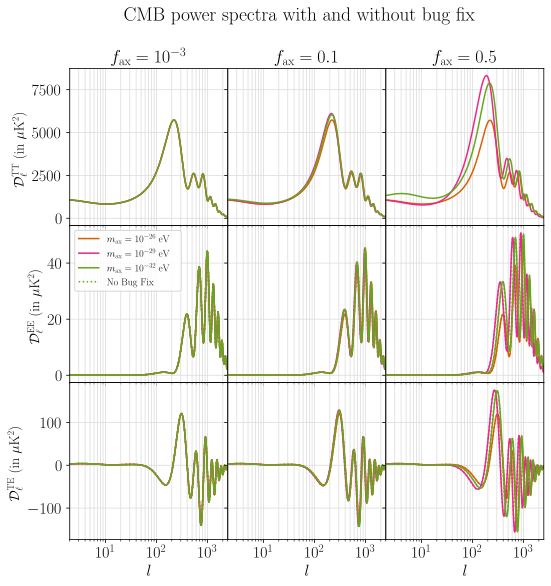

/var/folders/_m/ml_6yf156pvc6x23szdr5hc80000gr/T/ipykernel_17372/535995761.py:108: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(3,3, figsize = (8.5, 8.5),sharex=True,sharey='row',gridspec_kw={'hspace': 0,'wspace':0})


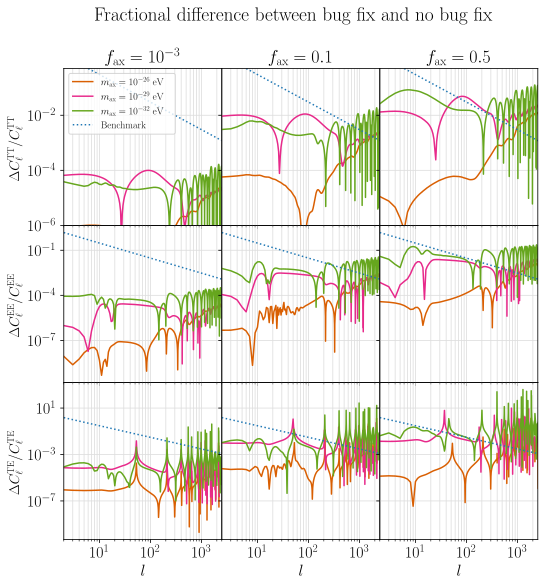

In [12]:
#Dimensionless hubble from the params.ini file
h = 67.31/100.00
get_scalar_cls_list = ['T', 'F']# Here it has to be 'T' but the filename doesn't have it anyways
mblist=[1.e-26,1.e-29,1.e-32]


m_ax_label_list = [m_axitem.replace('.', '') for m_axitem in m_ax_list] #To put in filenames
axfrac_list = ['1.e-3', '0.1', '0.5', '1.0'] #use string here to put in the call command 
                                            #(or else python would set it to zero)
axfrac_label_list_temp = [axfrac_item.replace('.e', 'e') for axfrac_item in axfrac_list] 
axfrac_label_list = [axfrac_item.replace('.', 'd') for axfrac_item in axfrac_label_list_temp] #To put in filenames
#Range of maximum k corresponding to the respoective axion masses,
#(for purposes of showing the best range of the transfer function)
kmax_list = [3, 1, 0.3, 0.1] 

#Define colormap and linestyle
colorsax0 = plt.cm.Dark2(np.linspace(0.2, 0.8, len(m_ax_label_list) + 1))
colorsax1 = colorsax0
#plt.cm.PuBu(np.linspace(0.2, 0.8, len(m_ax_label_list) + 1))
colorscdm = plt.cm.bone(np.linspace(0.4, 0.8, len(m_ax_label_list) + 1))
colorsdiff = plt.cm.summer(np.linspace(0.8, 0.2, len(m_ax_label_list) + 1))
#linescdm = ['solid', (0, (5, 1)), 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 'dotted', (0, (5, 10))]
lines = ['solid', 'dotted','dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), (0, (5, 10)),(0, (5, 1))]



fig, axs = plt.subplots(3,3, figsize = (8.5, 8.5),sharex=True,sharey='row',gridspec_kw={'hspace': 0,'wspace':0})
fig.subplots_adjust(hspace=.0)
for i in range(len(axfrac_list)-1):
    axfrac = axfrac_list[i]
    axfrac_label = axfrac_label_list[i]
  #  axs.formatter.use_mathtext='true'
#    axs.formatter.use_mathtex
#     axs[0][i].grid(which = 'both')
#     axs[0][i].grid(which = 'both')
#     axs[0][i].grid(which = 'both')
    axs[0][i].grid(which = 'both')
    axs[0][i].grid(which = 'both')
    axs[0][i].grid(which = 'both')
    axs[1][i].grid(which = 'both')
    axs[1][i].grid(which = 'both')
    axs[1][i].grid(which = 'both')
    axs[2][i].grid(which = 'both')
    axs[2][i].grid(which = 'both')
    axs[2][i].grid(which = 'both')
    for j in range(len(m_ax_list)):
        m_ax_label = m_ax_label_list[j]
        #Cls before debugging
        usep=parent_path+'/axionCAMB-nobugfix'
        os.chdir(usep)
        l_before, TT_before, EE_before, TE_before = np.loadtxt('scalCls_max=%seV_axfrac=%s.dat'\
                                                               %(m_ax_label, axfrac_label), unpack = True)
        #Cls after debugging
        usep=parent_path+'/axionCAMB-bugfix'
        os.chdir(usep)
        l_after, TT_after, EE_after, TE_after = np.loadtxt('postdebug_scalCls_max=%seV_axfrac=%s.dat'\
                                                               %(m_ax_label, axfrac_label), unpack = True)
    
        lj=str(num2tex("{:}".format(mblist[j])))
        lj=lj[np.size(lj)-9:]
        axs[0][i].plot(l_after, TT_after, color = colorsax1[j],linestyle='solid',linewidth=1.5,label=r'$m_{\rm ax}='+lj+'$'+r'$~{\rm eV}$')
        axs[1][i].plot(l_after, EE_after, color = colorsax1[j],linestyle='solid',linewidth=1.5,label=r'$m_{\rm ax}='+lj+'$'+r'$~{\rm eV}$')
        axs[2][i].plot(l_after, TE_after, color = colorsax1[j],linestyle='solid',linewidth=1.5,label=r'$m_{\rm ax}='+lj+'$'+r'$~{\rm eV}$')

        if (i ==0 and j ==2):
            axs[1][i].plot(l_after, EE_before, color = colorsax1[j],linestyle='dotted',linewidth=1.5,label=r'No Bug Fix')

        axs[1][i].plot(l_after, EE_before, color = colorsax1[j],linestyle='dotted',linewidth=1.5)
        axs[2][i].plot(l_after, TE_before, color = colorsax1[j],linestyle='dotted',linewidth=1.5)

        
        
        #   print(label)

    axs[0][0].set_xlim([2,2500])
    axs[0][1].set_xlim([2,2500])
    axs[0][2].set_xlim([2,2500])
    axs[0][0].set_ylabel(r'$\mathcal{D}_{\ell}^{\rm TT}$'+'~(in'+ r'$~\mu{\rm K}^{2})$', fontsize = 14)
    axs[1][0].set_ylabel(r'$\mathcal{D}_{\ell}^{\rm EE}$'+'~(in'+ r'$~\mu{\rm K}^{2})$', fontsize = 14)
    axs[2][0].set_ylabel(r'$\mathcal{D}_{\ell}^{\rm TE}$'+'~(in'+ r'$~\mu{\rm K}^{2})$', fontsize = 14)

    afj=str(num2tex("{:1}".format(axfrac)))
      
    afj=afj[np.size(lj)-9:]
    axs[0][i].set_title(r'$f_\text{ax}='+afj+'$', fontsize = 18)  
   
    
    
    axs[1][0].legend(fontsize = 10, loc = 'upper left', fancybox=True) 
    axs[0][0].set_xscale('log')
    axs[0][1].set_xscale('log')
    axs[0][2].set_xscale('log')
    axs[1][0].set_xscale('log')
    axs[1][1].set_xscale('log')
    axs[1][2].set_xscale('log')
    axs[2][0].set_xscale('log')
    axs[2][1].set_xscale('log')
    axs[2][2].set_xscale('log')
    axs[2][0].set_xlabel(r'$l$')
    axs[2][1].set_xlabel(r'$l$')
    axs[2][2].set_xlabel(r'$l$')
  #  plt.tight_layout()
plt.suptitle('CMB power spectra with and without bug fix')

plt.show()


fig, axs = plt.subplots(3,3, figsize = (8.5, 8.5),sharex=True,sharey='row',gridspec_kw={'hspace': 0,'wspace':0})
fig.subplots_adjust(hspace=.0)

#Loop over the axion fraction
for i in range(len(axfrac_list)-1):
    axfrac = axfrac_list[i]
    axfrac_label = axfrac_label_list[i]
  #  axs.formatter.use_mathtext='true'
#    axs.formatter.use_mathtex
#     axs[0][i].grid(which = 'both')
#     axs[0][i].grid(which = 'both')
#     axs[0][i].grid(which = 'both')
    axs[0][i].grid(which = 'both')
    axs[0][i].grid(which = 'both')
    axs[0][i].grid(which = 'both')
    axs[1][i].grid(which = 'both')
    axs[1][i].grid(which = 'both')
    axs[1][i].grid(which = 'both')
    axs[2][i].grid(which = 'both')
    axs[2][i].grid(which = 'both')
    axs[2][i].grid(which = 'both')
    for j in range(len(m_ax_list)):
        m_ax_label = m_ax_label_list[j]
        #Cls before debugging
        os.chdir('../axionCAMB-nobugfix/')
        l_before, TT_before, EE_before, TE_before = np.loadtxt('scalCls_max=%seV_axfrac=%s.dat'\
                                                               %(m_ax_label, axfrac_label), unpack = True)
        #Cls after debugging
        os.chdir('../axionCAMB-bugfix/')
        l_after, TT_after, EE_after, TE_after = np.loadtxt('postdebug_scalCls_max=%seV_axfrac=%s.dat'\
                                                               %(m_ax_label, axfrac_label), unpack = True)
    
        lj=str(num2tex("{:}".format(mblist[j])))
        lj=lj[np.size(lj)-9:]
        
        axs[0][i].plot(l_after, abs(TT_before/TT_after - 1.), color = colorsax1[j],linestyle='solid',linewidth=1.5,label=r'$m_{\rm ax}='+lj+'$'+r'$~{\rm eV}$')

        axs[1][i].plot(l_after, abs(EE_before/EE_after - 1.), color = colorsax1[j],linestyle='solid',linewidth=1.5,label=r'$m_{\rm ax}='+lj+'$'+r'$~{\rm eV}$')
        axs[2][i].plot(l_after, abs(TE_before/TE_after - 1.), color = colorsax1[j],linestyle='solid',linewidth=1.5,label=r'$m_{\rm ax}='+lj+'$'+r'$~{\rm eV}$')

        #   print(label)
    axs[0][i].plot(l_after, 3/l_after,linestyle='dotted',linewidth=1.5,label=r'Benchmark')
    axs[1][i].plot(l_after, 3/l_after,linestyle='dotted',linewidth=1.5)
    axs[2][i].plot(l_after, 3/l_after,linestyle='dotted',linewidth=1.5)

    
    
    axs[0][0].set_xlim([2,2500])
    axs[0][1].set_xlim([2,2500])
    axs[0][2].set_xlim([2,2500])
    axs[0][0].set_ylabel(r'${\Delta C_{\ell}^{\rm TT}/C_{\ell}^{\rm TT}}$', fontsize = 14)
    axs[1][0].set_ylabel(r'${\Delta C_{\ell}^{\rm EE}/C_{\ell}^{\rm EE}}$', fontsize = 14)
    axs[2][0].set_ylabel(r'${\Delta C_{\ell}^{\rm TE}/C_{\ell}^{\rm TE}}$', fontsize = 14)

    afj=str(num2tex("{:1}".format(axfrac)))
      
    afj=afj[np.size(lj)-9:]
    axs[0][i].set_title(r'$f_\text{ax}='+afj+'$', fontsize = 18)  
   
    
    
    axs[0][0].legend(fontsize = 10, loc = 'upper left', fancybox=True) 
    axs[0][0].set_xscale('log')
    axs[0][1].set_xscale('log')
    axs[0][2].set_xscale('log')
    axs[1][0].set_xscale('log')
    axs[1][1].set_xscale('log')
    axs[1][2].set_xscale('log')
    axs[2][0].set_xscale('log')
    axs[2][1].set_xscale('log')
    axs[2][2].set_xscale('log')

    axs[0][0].set_yscale('log')
    axs[0][1].set_yscale('log')
    axs[0][2].set_yscale('log')
    axs[1][0].set_yscale('log')
    axs[1][1].set_yscale('log')
    axs[1][2].set_yscale('log')
    axs[2][0].set_yscale('log')
    axs[2][1].set_yscale('log')
    axs[2][2].set_yscale('log')

    axs[0][0].set_ylim([1.e-6,5.e-1])
    axs[0][1].set_ylim([1.e-6,5.e-1])
    axs[0][2].set_ylim([1.e-6,5.e-1])
    axs[2][0].set_xlabel(r'$l$')
    axs[2][1].set_xlabel(r'$l$')
    axs[2][2].set_xlabel(r'$l$')
#     plt.tight_layout()
plt.suptitle('Fractional difference between bug fix and no bug fix')
plt.show()
plt.close()



### Section 5-- 
Axion Transfer functions $T(k,0)$ plotted.


/var/folders/_m/ml_6yf156pvc6x23szdr5hc80000gr/T/ipykernel_17372/6969335.py:28: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(1,3, figsize = (11, 3.6666),sharey='row',gridspec_kw={'wspace': 0})


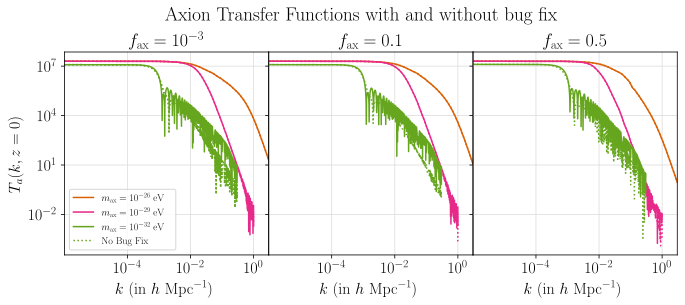

/var/folders/_m/ml_6yf156pvc6x23szdr5hc80000gr/T/ipykernel_17372/6969335.py:109: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(1,3, figsize = (11, 3.666),sharey='row',gridspec_kw={'wspace': 0})


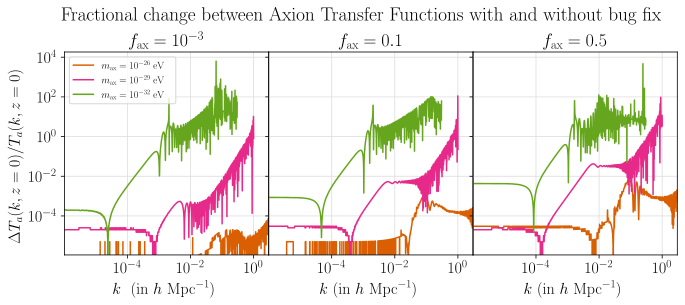

In [7]:
#Dimensionless hubble from the params.ini file
h = 67.31/100.00
#Preset False
get_scalar_cls = 'F'
mblist=[1.e-26,1.e-29,1.e-32]


m_ax_label_list = [m_axitem.replace('.', '') for m_axitem in m_ax_list] #To put in filenames
axfrac_list = ['1.e-3', '0.1', '0.5', '1.0'] #use string here to put in the call command 
                                            #(or else python would set it to zero)
axfrac_label_list_temp = [axfrac_item.replace('.e', 'e') for axfrac_item in axfrac_list] 
axfrac_label_list = [axfrac_item.replace('.', 'd') for axfrac_item in axfrac_label_list_temp] #To put in filenames
#Range of maximum k corresponding to the respoective axion masses,
#(for purposes of showing the best range of the transfer function)
kmax_list = [3, 1, 0.3, 0.1] 

#Define colormap and linestyle
colorsax0 = plt.cm.Dark2(np.linspace(0.2, 0.8, len(m_ax_label_list) + 1))
colorsax1 = colorsax0
#plt.cm.PuBu(np.linspace(0.2, 0.8, len(m_ax_label_list) + 1))
colorscdm = plt.cm.bone(np.linspace(0.4, 0.8, len(m_ax_label_list) + 1))
colorsdiff = plt.cm.summer(np.linspace(0.8, 0.2, len(m_ax_label_list) + 1))
#linescdm = ['solid', (0, (5, 1)), 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 'dotted', (0, (5, 10))]
lines = ['solid', 'dotted','dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), (0, (5, 10)),(0, (5, 1))]



fig, axs = plt.subplots(1,3, figsize = (11, 3.6666),sharey='row',gridspec_kw={'wspace': 0})
fig.subplots_adjust(hspace=.0)
for i in range(len(axfrac_list)-1):
    axfrac = axfrac_list[i]
    axfrac_label = axfrac_label_list[i]

    axs[i].grid(which = 'both')
    axs[i].grid(which = 'both')
    axs[i].grid(which = 'both')
    for j in range(len(m_ax_list)):
        m_ax_label = m_ax_label_list[j]
        #Tk before debugging
        usep=parent_path+'/axionCAMB-nobugfix'
        os.chdir(usep)
        
        Transfer_kh_before, Transfer_cdm_before,Transfer_b_before,Transfer_g_before, Transfer_r_before, \
        Transfer_nu_before, Transfer_axion_before, Transfer_after_before, Transfer_tot_before = \
        np.loadtxt(usep+'/transfer_max=%seV_axfrac=%s_getscalarcls=%s.dat'\
                            %(m_ax_label, axfrac_label, get_scalar_cls), unpack = True)
        usep=parent_path+'/axionCAMB-bugfix'

        #Tk after debugging
        Transfer_kh_after, Transfer_cdm_after,Transfer_b_after,Transfer_g_after, Transfer_r_after, Transfer_nu_after, \
        Transfer_axion_after, Transfer_after_after, Transfer_tot_after = \
        np.loadtxt(usep+'/postdebug_transfer_max=%seV_axfrac=%s_getscalarcls=%s.dat'\
                           %(m_ax_label, axfrac_label, get_scalar_cls), unpack = True)
        lj=str(num2tex("{:}".format(mblist[j])))
        lj=lj[np.size(lj)-9:]
        axs[i].plot(Transfer_kh_after*h, abs(Transfer_axion_after), color = colorsax1[j],linestyle='solid',linewidth=1.5,label=r'$m_{\rm ax}='+lj+'$'+r'$~{\rm eV}$')
        axs[i].plot(Transfer_kh_before*h, abs(Transfer_axion_before), color = colorsax1[j],linestyle='dotted',linewidth=1.5)
        if (i ==0 and j ==2):
            axs[i].plot(Transfer_kh_before*h, abs(Transfer_axion_before), color = colorsax1[j],linestyle='dotted',linewidth=1.5,label=r'No Bug Fix')

    afj=str(num2tex("{:1}".format(axfrac)))
      
    afj=afj[np.size(lj)-9:]
    axs[i].set_title(r'$f_\text{ax}='+afj+'$', fontsize = 18)         
    axs[0].legend(fontsize = 10, loc = 'lower left', fancybox=True) 
    axs[0].set_xscale('log')
    axs[1].set_xscale('log')
    axs[2].set_xscale('log')
   

    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    axs[2].set_yscale('log')
    axs[0].set_xlabel(r'$k~$'+'(in'+r'$~h~{\rm Mpc}^{-1})$')
    axs[1].set_xlabel(r'$k~$'+'(in'+r'$~h~{\rm Mpc}^{-1})$')
    axs[2].set_xlabel(r'$k~$'+'(in'+r'$~h~{\rm Mpc}^{-1})$')
    axs[0].set_ylabel(r'$T_{a}(k,z=0)$')
plt.suptitle('Axion Transfer Functions with and without bug fix',y=1.05)
plt.show()

#Dimensionless hubble from the params.ini file
h = 67.31/100.00
#Preset False
get_scalar_cls = 'F'
mblist=[1.e-26,1.e-29,1.e-32]
#m_ax_list = ['1.e-26', '1.e-28', '1.e-30', '1.e-32']#use string here to put in the call command 


m_ax_label_list = [m_axitem.replace('.', '') for m_axitem in m_ax_list] #To put in filenames
axfrac_list = ['1.e-3', '0.1', '0.5', '1.0'] #use string here to put in the call command 
                                            #(or else python would set it to zero)
axfrac_label_list_temp = [axfrac_item.replace('.e', 'e') for axfrac_item in axfrac_list] 
axfrac_label_list = [axfrac_item.replace('.', 'd') for axfrac_item in axfrac_label_list_temp] #To put in filenames
#Range of maximum k corresponding to the respoective axion masses,
#(for purposes of showing the best range of the transfer function)
kmax_list = [3, 1, 0.3, 0.1] 

#Define colormap and linestyle
colorsax0 = plt.cm.Dark2(np.linspace(0.2, 0.8, len(m_ax_label_list) + 1))
colorsax1 = colorsax0
#plt.cm.PuBu(np.linspace(0.2, 0.8, len(m_ax_label_list) + 1))
colorscdm = plt.cm.bone(np.linspace(0.4, 0.8, len(m_ax_label_list) + 1))
colorsdiff = plt.cm.summer(np.linspace(0.8, 0.2, len(m_ax_label_list) + 1))
#linescdm = ['solid', (0, (5, 1)), 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 'dotted', (0, (5, 10))]
lines = ['solid', 'dotted','dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), (0, (5, 10)),(0, (5, 1))]



fig, axs = plt.subplots(1,3, figsize = (11, 3.666),sharey='row',gridspec_kw={'wspace': 0})
fig.subplots_adjust(hspace=.0)
for i in range(len(axfrac_list)-1):
    axfrac = axfrac_list[i]
    axfrac_label = axfrac_label_list[i]

    axs[i].grid(which = 'both')
    axs[i].grid(which = 'both')
    axs[i].grid(which = 'both')
    for j in range(len(m_ax_list)):
        m_ax_label = m_ax_label_list[j]
        #Tk before debugging
        usep=parent_path+'/axionCAMB-nobugfix'
        os.chdir(usep)
        
        Transfer_kh_before, Transfer_cdm_before,Transfer_b_before,Transfer_g_before, Transfer_r_before, \
        Transfer_nu_before, Transfer_axion_before, Transfer_after_before, Transfer_tot_before = \
        np.loadtxt(usep+'/transfer_max=%seV_axfrac=%s_getscalarcls=%s.dat'\
                            %(m_ax_label, axfrac_label, get_scalar_cls), unpack = True)
        usep=parent_path+'/axionCAMB-bugfix'

        #Tk after debugging
        Transfer_kh_after, Transfer_cdm_after,Transfer_b_after,Transfer_g_after, Transfer_r_after, Transfer_nu_after, \
        Transfer_axion_after, Transfer_after_after, Transfer_tot_after = \
        np.loadtxt(usep+'/postdebug_transfer_max=%seV_axfrac=%s_getscalarcls=%s.dat'\
                           %(m_ax_label, axfrac_label, get_scalar_cls), unpack = True)
        lj=str(num2tex("{:}".format(mblist[j])))
        lj=lj[np.size(lj)-9:]
        axs[i].plot(Transfer_kh_after*h, abs(Transfer_axion_after/Transfer_axion_before-1), color = colorsax1[j],linestyle='solid',linewidth=1.5,label=r'$m_{\rm ax}='+lj+'$'+r'$~{\rm eV}$')
#         axs[i].plot(Transfer_kh_before*h, abs(Transfer_axion_before), color = colorsax1[j],linestyle='dotted',linewidth=1.5)
#         if (i ==0 and j ==2):
#             axs[i].plot(Transfer_kh_before*h, abs(Transfer_axion_before), color = colorsax1[j],linestyle='dotted',linewidth=1.5,label=r'No Bug Fix')

    afj=str(num2tex("{:1}".format(axfrac)))
      
    afj=afj[np.size(lj)-9:]
    axs[i].set_title(r'$f_\text{ax}='+afj+'$', fontsize = 18)         
    axs[0].legend(fontsize = 10, loc = 'upper left', fancybox=True) 
    axs[0].set_xscale('log')
    axs[1].set_xscale('log')
    axs[2].set_xscale('log')
    axs[0].set_ylabel(r'$\Delta T_{a}(k,z=0)/T_{a}(k,z=0)$')


    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    axs[2].set_yscale('log')
    axs[0].set_xlabel(r'$k~$~'+'(in'+r'$~h~{\rm Mpc}^{-1})$')
    axs[1].set_xlabel(r'$k$~'+'(in'+r'$~h~{\rm Mpc}^{-1})$')
    axs[2].set_xlabel(r'$k$~'+'(in'+r'$~h~{\rm Mpc}^{-1})$')
plt.suptitle('Fractional change between Axion Transfer Functions with and without bug fix',y=1.05)
plt.show()





### Section 6-- 
Matter power spectrum $P(k)$.


/var/folders/_m/ml_6yf156pvc6x23szdr5hc80000gr/T/ipykernel_17372/2471902029.py:28: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(1,3, figsize = (11, 3.6666),sharey='row',gridspec_kw={'wspace': 0})


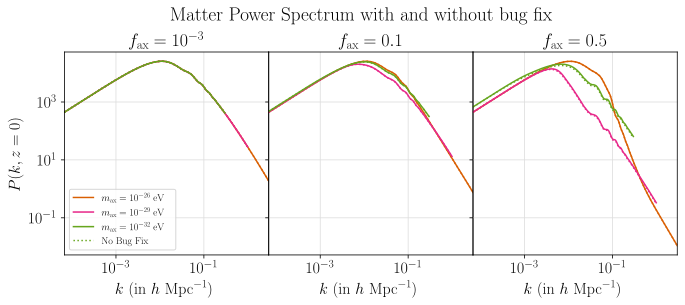

/var/folders/_m/ml_6yf156pvc6x23szdr5hc80000gr/T/ipykernel_17372/2471902029.py:107: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(1,3, figsize = (11, 3.6666),sharey='row',gridspec_kw={'wspace': 0})


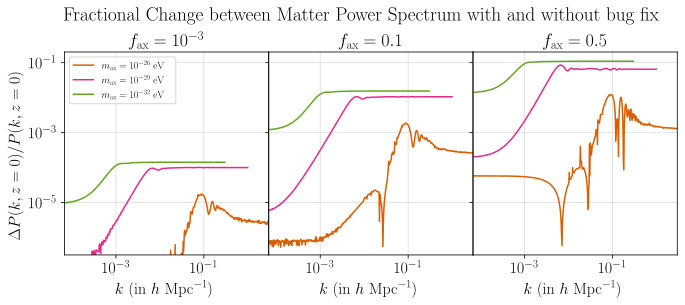

In [8]:
#Dimensionless hubble from the params.ini file
h = 67.31/100.00
#Preset False
get_scalar_cls = 'F'
mblist=[1.e-26,1.e-29,1.e-32]


m_ax_label_list = [m_axitem.replace('.', '') for m_axitem in m_ax_list] #To put in filenames
axfrac_list = ['1.e-3', '0.1', '0.5', '1.0'] #use string here to put in the call command 
                                            #(or else python would set it to zero)
axfrac_label_list_temp = [axfrac_item.replace('.e', 'e') for axfrac_item in axfrac_list] 
axfrac_label_list = [axfrac_item.replace('.', 'd') for axfrac_item in axfrac_label_list_temp] #To put in filenames
#Range of maximum k corresponding to the respoective axion masses,
#(for purposes of showing the best range of the transfer function)
kmax_list = [3, 1, 0.3, 0.1] 

#Define colormap and linestyle
colorsax0 = plt.cm.Dark2(np.linspace(0.2, 0.8, len(m_ax_label_list) + 1))
colorsax1 = colorsax0
#plt.cm.PuBu(np.linspace(0.2, 0.8, len(m_ax_label_list) + 1))
colorscdm = plt.cm.bone(np.linspace(0.4, 0.8, len(m_ax_label_list) + 1))
colorsdiff = plt.cm.summer(np.linspace(0.8, 0.2, len(m_ax_label_list) + 1))
#linescdm = ['solid', (0, (5, 1)), 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 'dotted', (0, (5, 10))]
lines = ['solid', 'dotted','dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), (0, (5, 10)),(0, (5, 1))]



fig, axs = plt.subplots(1,3, figsize = (11, 3.6666),sharey='row',gridspec_kw={'wspace': 0})
fig.subplots_adjust(hspace=.0)
for i in range(len(axfrac_list)-1):
    axfrac = axfrac_list[i]
    axfrac_label = axfrac_label_list[i]

    axs[i].grid(which = 'both')
    axs[i].grid(which = 'both')
    axs[i].grid(which = 'both')
    for j in range(len(m_ax_list)):
        m_ax_label = m_ax_label_list[j]
        #Pk before debugging
        
        usep=parent_path+'/axionCAMB-nobugfix'
        os.chdir(usep)
        
        kh_before, Pk_before = np.loadtxt(usep+'/matterpower_max=%seV_axfrac=%s_getscalarcls=%s.dat'\
                            %(m_ax_label, axfrac_label, get_scalar_cls), unpack = True)
        usep=parent_path+'/axionCAMB-bugfix'

        #Pk after debugging
        kh_after, Pk_after = np.loadtxt(usep+'/postdebug_matterpower_max=%seV_axfrac=%s_getscalarcls=%s.dat'\
                            %(m_ax_label, axfrac_label, get_scalar_cls), unpack = True)
        lj=str(num2tex("{:}".format(mblist[j])))
        lj=lj[np.size(lj)-9:]
        axs[i].plot(kh_after*h, abs(Pk_after), color = colorsax1[j],linestyle='solid',linewidth=1.5,label=r'$m_{\rm ax}='+lj+'$'+r'$~{\rm eV}$')
        axs[i].plot(kh_before*h, abs(Pk_before), color = colorsax1[j],linestyle='dotted',linewidth=1.5)
        if (i ==0 and j ==2):
            axs[i].plot(kh_before*h, abs(Pk_before), color = colorsax1[j],linestyle='dotted',linewidth=1.5,label=r'No Bug Fix')

    afj=str(num2tex("{:1}".format(axfrac)))
      
    afj=afj[np.size(lj)-9:]
    axs[i].set_title(r'$f_\text{ax}='+afj+'$', fontsize = 18)         
    axs[0].legend(fontsize = 10, loc = 'lower left', fancybox=True) 
    axs[0].set_xscale('log')
    axs[1].set_xscale('log')
    axs[2].set_xscale('log')
   

    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    axs[2].set_yscale('log')
    axs[0].set_xlabel(r'$k~$'+'(in'+r'$~h~{\rm Mpc}^{-1})$')
    axs[1].set_xlabel(r'$k~$'+'(in'+r'$~h~{\rm Mpc}^{-1})$')
    axs[2].set_xlabel(r'$k~$'+'(in'+r'$~h~{\rm Mpc}^{-1})$')
    axs[0].set_ylabel(r'$P(k,z=0)$')
    plt.suptitle('Matter Power Spectrum with and without bug fix',y=1.05)
plt.show()


#Dimensionless hubble from the params.ini file
h = 67.31/100.00
#Preset False
get_scalar_cls = 'F'
mblist=[1.e-26,1.e-29,1.e-32]
#m_ax_list = ['1.e-26', '1.e-28', '1.e-30', '1.e-32']#use string here to put in the call command 


m_ax_label_list = [m_axitem.replace('.', '') for m_axitem in m_ax_list] #To put in filenames
axfrac_list = ['1.e-3', '0.1', '0.5', '1.0'] #use string here to put in the call command 
                                            #(or else python would set it to zero)
axfrac_label_list_temp = [axfrac_item.replace('.e', 'e') for axfrac_item in axfrac_list] 
axfrac_label_list = [axfrac_item.replace('.', 'd') for axfrac_item in axfrac_label_list_temp] #To put in filenames
#Range of maximum k corresponding to the respoective axion masses,
#(for purposes of showing the best range of the transfer function)
kmax_list = [3, 1, 0.3, 0.1] 

#Define colormap and linestyle
colorsax0 = plt.cm.Dark2(np.linspace(0.2, 0.8, len(m_ax_label_list) + 1))
colorsax1 = colorsax0
#plt.cm.PuBu(np.linspace(0.2, 0.8, len(m_ax_label_list) + 1))
colorscdm = plt.cm.bone(np.linspace(0.4, 0.8, len(m_ax_label_list) + 1))
colorsdiff = plt.cm.summer(np.linspace(0.8, 0.2, len(m_ax_label_list) + 1))
#linescdm = ['solid', (0, (5, 1)), 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 'dotted', (0, (5, 10))]
lines = ['solid', 'dotted','dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), (0, (5, 10)),(0, (5, 1))]



fig, axs = plt.subplots(1,3, figsize = (11, 3.6666),sharey='row',gridspec_kw={'wspace': 0})
fig.subplots_adjust(hspace=.0)
for i in range(len(axfrac_list)-1):
    axfrac = axfrac_list[i]
    axfrac_label = axfrac_label_list[i]

    axs[i].grid(which = 'both')
    axs[i].grid(which = 'both')
    axs[i].grid(which = 'both')
    for j in range(len(m_ax_list)):
        m_ax_label = m_ax_label_list[j]
        #Pk before debugging
        
        usep=parent_path+'/axionCAMB-nobugfix'
        os.chdir(usep)
        
        kh_before, Pk_before = np.loadtxt(usep+'/matterpower_max=%seV_axfrac=%s_getscalarcls=%s.dat'\
                            %(m_ax_label, axfrac_label, get_scalar_cls), unpack = True)
        usep=parent_path+'/axionCAMB-bugfix'

        #Pk after debugging
        kh_after, Pk_after = np.loadtxt(usep+'/postdebug_matterpower_max=%seV_axfrac=%s_getscalarcls=%s.dat'\
                            %(m_ax_label, axfrac_label, get_scalar_cls), unpack = True)
        lj=str(num2tex("{:}".format(mblist[j])))
        lj=lj[np.size(lj)-9:]
        axs[i].plot(kh_after*h, abs(Pk_after/Pk_before-1), color = colorsax1[j],linestyle='solid',linewidth=1.5,label=r'$m_{\rm ax}='+lj+'$'+r'$~{\rm eV}$')
#         if (i ==0 and j ==2):
#             axs[i].plot(kh_before*h, abs(Pk_after/Pk_before-1), color = colorsax1[j],linestyle='dotted',linewidth=1.5,label=r'No Bug Fix')

    afj=str(num2tex("{:1}".format(axfrac)))
      
    afj=afj[np.size(lj)-9:]
    axs[i].set_title(r'$f_\text{ax}='+afj+'$', fontsize = 18)         
    axs[0].legend(fontsize = 10, loc = 'upper left', fancybox=True) 
    axs[0].set_xscale('log')
    axs[1].set_xscale('log')
    axs[2].set_xscale('log')
   

    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    axs[2].set_yscale('log')
    axs[0].set_xlabel(r'$k~$'+'(in'+r'$~h~{\rm Mpc}^{-1})$')
    axs[1].set_xlabel(r'$k~$'+'(in'+r'$~h~{\rm Mpc}^{-1})$')
    axs[2].set_xlabel(r'$k~$'+'(in'+r'$~h~{\rm Mpc}^{-1})$')
    axs[0].set_ylabel(r'$\Delta P(k,z=0)/P(k,z=0)$')
    plt.suptitle('Fractional Change between Matter Power Spectrum with and without bug fix',y=1.05)
plt.show()